In [ ]:
# Import Libraries
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers  as KL
import tensorflow.keras.models  as KM


In [ ]:

## Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [41]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
def plt_input_image(i):
  plt.imshow(x_train[i],cmap='binary')
  plt.title(y_train[i])
  plt.show()

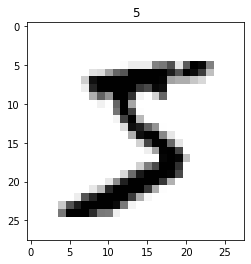

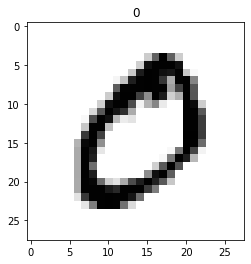

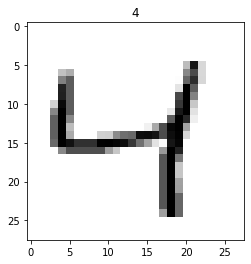

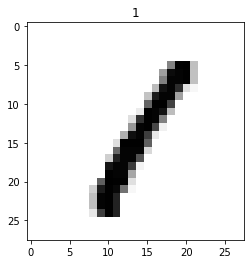

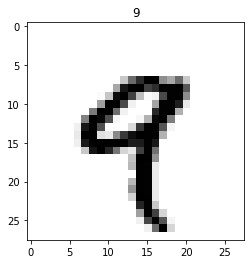

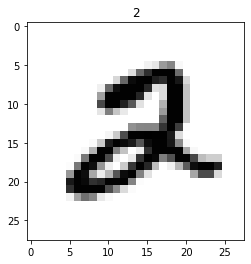

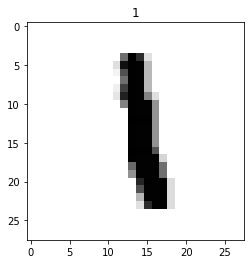

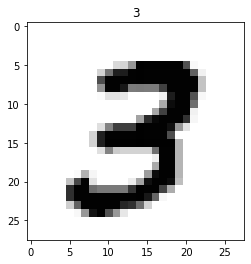

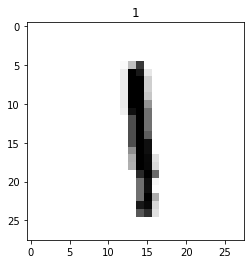

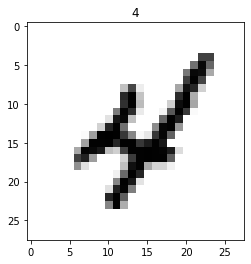

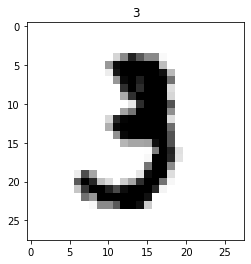

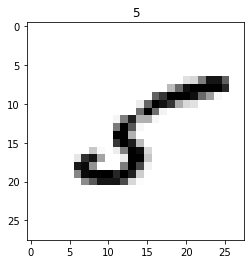

In [ ]:
for i in range(12):
  plt_input_image(i)

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)

In [ ]:

## Model
inputs = KL.Input(shape=(28, 28, 1))
c = KL.Conv2D(32, (3, 3), padding="valid", activation=tf.nn.relu)(inputs)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(64, (3, 3), padding="valid", activation=tf.nn.relu)(d)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(128, (3, 3), padding="valid", activation=tf.nn.relu)(d)
f = KL.Flatten()(c)
outputs = KL.Dense(10, activation=tf.nn.softmax)(f)

model = KM.Model(inputs, outputs)
model.summary()
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                       

In [ ]:
score=model.evaluate(x_test,y_test)
print(f"the model accuracy is{score[1]} ")

313/313 [==============================] - 4s 12ms/step - loss: 0.0324 - accuracy: 0.9887
the model accuracy is0.9886999726295471 


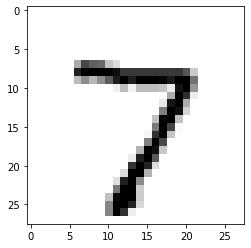

In [50]:
(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()
test_image=x_test2[0]
plt.imshow(test_image,cmap='binary')

In [51]:

label = np.argmax(model.predict(image.reshape(1,28,28,1)))
label

1/1 [==============================] - 0s 43ms/step


7